In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


이미지는 28x28 NumPy 배열이며 픽셀 값은 0에서 255까지이며 target값의 의미는 아래 표와 같다

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

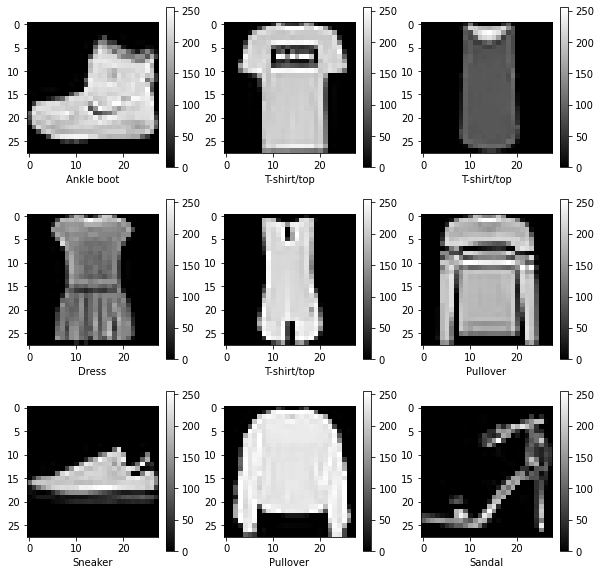

In [ ]:
# 이미지를 몇개 띄워보도록 하겠다.
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(class_names[y_train[i]])
  plt.colorbar()
plt.show()

위의 데이터를 통해 이미지의 시각적 파악과 컬러의 값이 0~255 사이에 있음을 알 수 있다. 

In [ ]:
# 데이터셋의 input 값 범위를 0~1사이로 정규화해준다.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# 모델을 설계해준다.
model = tf.keras.Sequential([
    # 케라스의 flatten레이어를 통해 2차원 이미지를 28x28의 1차원 텐서로 변환한다
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 128가의 weight, bias 백터를 통과시켜 batch x 128의 벡터로 만든다.
    tf.keras.layers.Dense(128, activation='relu'),
    # 10가지의 벡터로 압축한다.
    tf.keras.layers.Dense(10),
    # 결과를 확률값으로 바꾸어 표현해준다.
    tf.keras.layers.Softmax()
])

In [ ]:
# 모델을 컴파일한다. optimizer와 loss_function을 선택하고 평가지표인 metrics를 선택한다. from_logit의 경우 model의 결과가 확률로 나올경우 false 확률이 아닐경우 true로 해주면 된다.
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=6)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3139 - accuracy: 0.8847
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8909
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.8959


In [ ]:
# 학습된 모델을 통해 평가를 진행해본다. verbose의 경우 평가한 정보를 0일 경우 생략, 1은 자세히, 2는 간단히 표시한다.
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3429 - accuracy: 0.8777 - 421ms/epoch - 1ms/step


[0.34286969900131226, 0.8776999711990356]

In [ ]:
# 모델의 결과값을 직접확인해본다.
pred = model.predict(x_test)
print(pred[0])

313/313 [==============================] - 0s 1ms/step
[2.4032831e-06 3.1171510e-07 2.1772885e-07 3.9572851e-07 3.2440050e-07
 1.6929816e-02 2.4585561e-06 6.9473595e-03 4.1424250e-05 9.7607523e-01]


In [ ]:
# output확률중 가장 큰 값의 위치를 확인한다.
print('예상값 : ',np.argmax(pred[0]))
# 실제 결과를 확인한다.
print('실제값 : ',y_test[0])

예상값 :  9
실제값 :  9


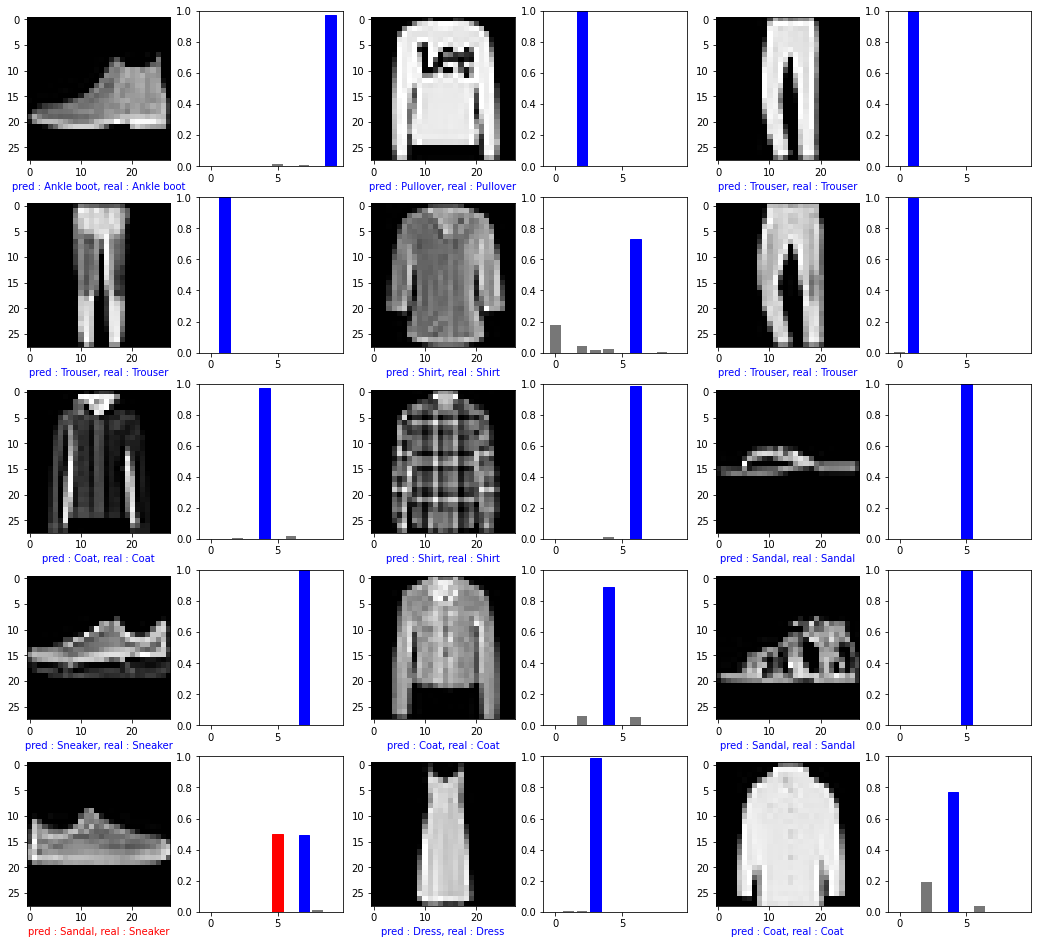

In [40]:
# 예측값들의 분포에 대한것을 시각적으로 표현해보겠다
plt.figure(figsize=(18,20))
for i in range(15):
  plt.subplot(6,6,2*i+1)
  plt.imshow(x_test[i],cmap='gray')
  if np.argmax(pred[i]) == y_test[i]:
    col = 'blue'
  else :
    col = 'red'
  plt.xlabel(f'pred : {class_names[np.argmax(pred[i])]}, real : {class_names[y_test[i]]}',color = col)

  plt.subplot(6,6,2*i+2)
  bar_chart = plt.bar(range(10), pred[i], color = '#777777')
  plt.ylim(0,1)
  bar_chart[np.argmax(pred[i])].set_color('red')
  bar_chart[y_test[i]].set_color('blue')

plt.show()